In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

personinfo = np.genfromtxt("person.csv", delimiter=";", skip_header=1)
roominfo = np.genfromtxt("room.csv", delimiter=";", skip_header=1)
actioninfo = np.genfromtxt("action.csv", delimiter=";", skip_header=1)
print(personinfo)

['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], ['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5']


In [ ]:
action_history = personinfo[:,2]  #gets action of history
personality = personinfo[:,[0,1]] #gets initial personality
room_status_fin = roominfo[:]     #gets name and individuals in room 
action_diff = []

array([[ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       [11.2  ,  0.28 ,  0.56 , ...,  0.58 ,  9.8  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
for x in personinfo:   #gets the difference between personality and mean action vector
    action_log = x[2]
    personality = x[1]
    mlv = action_log[:,2] 
    action_avg = np.mean(mlv, axis = 0)   #averages most likely vector of each action
    action_diff.append(np.subtract(personality - action_avg))
print(action_diff)  
    

(1598, 12)

In [ ]:
count = 0
inConv = False
convtot = []
for action in action_history: #gets mean length of conversation
    if action.name == 'Start Conversation':
        count = 1
        inConv = True
    elif action.name == 'Leave Conversation':
        convtot.append(count)
        inConv = False
    elif inConv:
        count += 1
avgconv = sum(convtot) / len(convtot)


array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
freq_dict = {}
for action in action_history: #frequency distribution of person's actions
    if action.name in freq_dict:
        freq_dict[action.name] += 1
    else:
        freq_dict[action.name] = 1
print(freq_dict)
    

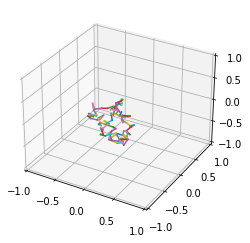

In [92]:
signs = [-1, 1]
magnitudes = [mag / 100 for mag in range(1,10)]

num_dimensions = 3
num_change_vectors = 100

example_vectors = np.array([[np.random.choice(magnitudes) * np.random.choice(signs) for _ in range(num_dimensions)] for _ in range(num_change_vectors)])

# Obsolete matplotlib method (second method is better)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

prev_pos = np.array([0,0,0])
#Plot the change vectors
for example_vector in example_vectors:
    x1,y1,z1 = prev_pos
    new_pos = prev_pos + example_vector
    x2,y2,z2 = new_pos
    ax.plot((x1,x2),(y1,y2),(z1,z2))
    prev_pos = new_pos

In [55]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

rs = np.random.RandomState()
rs.seed(0)

In [89]:
def plot_3D_positions(positions):
    x, y, z = positions
    index = np.array([x for x in range(10)])

    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        marker=dict(
            size=4,
            colorscale='Viridis',
        ),
        line=dict(
            color=index,
            width=2
        ))])

    fig.update_layout(
        width=800,
        height=700,
        autosize=False,
        scene=dict(
            xaxis = dict(nticks=4, range=[-1,1],),
            yaxis = dict(nticks=4, range=[-1,1],),
            zaxis = dict(nticks=4, range=[-1,1],),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=0,
                    y=1.0707,
                    z=1,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )

    return fig


dummy_positions = np.vstack([[x for x in np.linspace(-1,1, 10)] for _ in range(3)])
print(dummy_positions)
plot_3D_positions(dummy_positions)

[[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]
 [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]]


In [91]:
plot_3D_positions(example_vectors.transpose())